In [1]:
# Setting up the Colab environment. DO NOT EDIT!
try:
  from applied_biostats import setup_environment
except ImportError:
  !pip -q install applied-biostats-helper
  from applied_biostats import setup_environment
finally:
  grader = setup_environment('Module05_walkthrough')

# Walkthrough

## Learning Objectives
At the end of this learning activity you will be able to:
 - Create barplots of categorical count data.
 - Adjust the limits, labels, and titles of matplotlib axes.
 - Create boxplots of continious numerical data.
 - Generate histograms of continious numerical data.
 - Construct scatterplots to compare continious variables.

In [2]:
import numpy as np
import pandas as pd

# A common import style you'll see across the web
import matplotlib.pyplot as plt

# Make the notebook show images as we make them
%matplotlib inline

## Matplotlib

Matplotlib is a highly influential plotting library in Python dating back to the early 2000s.
It was initially created by John D. Hunter, a neurobiologist, as an alternative to MATLAB, which was widely used at the time for scientific computing and data visualization.
His primary motivation was to have an open-source tool that could replicate MATLAB's plotting capabilities, which he needed for his work in electrophysiology.
Over the years, it has grown with contributions from a large community of developers, evolving to support a wide range of plots and visualizations.

A key to Matplotlib's success is been its flexibility and integration with other Python libraries.
It works well with NumPy and Pandas, making it a go-to choice for data analysis and manipulation tasks.
Its integration with Jupyter notebooks has also made it popular for exploratory data analysis in a notebook environment.

Matplotlib's design philosophy revolves around the idea of allowing users to create simple plots with just a few lines of code, while also giving them the ability to make complex customizations.
This balance between simplicity and power has contributed significantly to its widespread adoption.

If you are interested, you can read more about the history of the package at their [website](https://matplotlib.org/stable/users/project/history.html).


## Data

This week we will look at data from a cohort of People Living with HIV (PLH) here at Drexel.

As we discussed in the introduction, this data collection effort was done to provide a resource for many projects across the fields of HIV, aging, inflammation, neurocognitive impairment, immune function, and unknowable future projects.
In this walkthrough we will explore a collection of cytokines and chemokines measured by a Luminex panel of common biomarkers of inflammation.

In [3]:
data = pd.read_csv('cytokine_data.csv')
data.head()

,Sex,Age,isAA,egf,eotaxin,fgfbasic,gcsf,gmcsf,hgf,ifnalpha,...,mig,mip1alpha,mip1beta,tnfalpha,vegf,cocaine_use,cannabinoid_use,neuro_screen_impairment_level,bmi,years_infected
0,Male,53.0,Checked,65.01,170.20,50.32,117.14,2.51,481.37,110.79,...,185.29,104.63,151.15,17.61,7.54,True,True,none,21,18
1,Female,62.0,Checked,232.83,118.23,36.03,215.38,24.53,988.71,66.13,...,397.24,242.10,230.87,51.22,31.60,True,True,none,22,16
2,Male,60.0,Checked,84.84,55.27,13.22,14.08,0.48,364.31,78.67,...,18.63,34.85,68.34,2.48,0.84,False,False,none,25,16
3,Male,62.0,Checked,24.13,70.18,4.12,14.08,1.33,510.36,118.64,...,118.63,113.30,49.15,10.93,3.53,True,True,impaired,29,21
4,Male,54.0,Checked,186.98,69.18,32.56,184.74,12.55,395.87,40.79,...,140.56,131.83,241.00,32.01,10.81,True,True,none,26,16


## Basic Plotting

`pandas` and `matplotlib` are tightly coupled and provide a number of ways to make simple plots easily.
Most pandas objects have `.plot()` method that can graph the data within it and control many of the outputs.

Columns (or any `pd.Series` object) have a method for easily counting categorical values:
`.value_counts()`

In [4]:
data['Sex'].value_counts()

Sex
Male           140
Female          82
Transgender      2
Name: count, dtype: int64

<Axes: xlabel='Sex'>

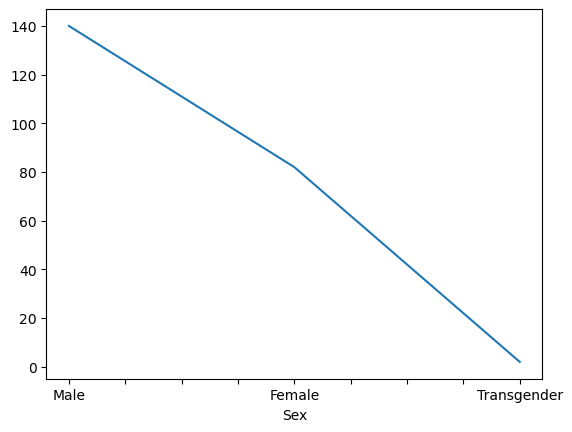

In [5]:
# Just plot it.

data['Sex'].value_counts().plot()

That's _almost_ what we want.
By default, the `kind` of plot is a line-plot, because it was originally designed for time-series financial data.
Nicely, pandas allows many different ways to customize a plot.
One of which, is to change its `kind`, we can change that like so.

<Axes: xlabel='Sex'>

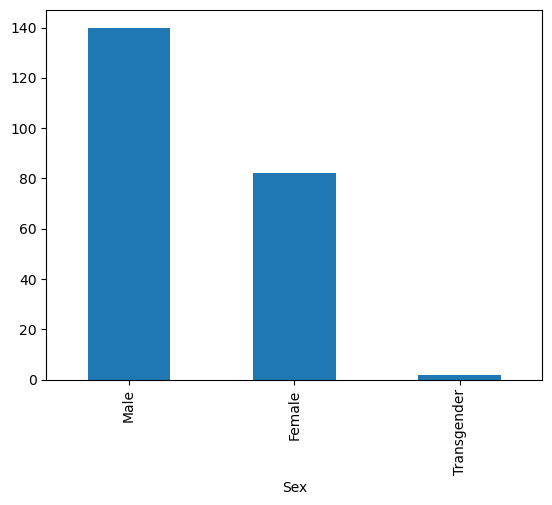

In [6]:
data['Sex'].value_counts().plot(kind = 'bar')

Like we learned last week, grouping samples by categories can be insightful.
What if we wanted to know whether there was a balance of racial minorities across our gender categories?

To do this, you can use `groupby` to create multiple levels.

In [7]:
data.groupby('Sex')['isAA'].value_counts()

Sex          isAA     
Female       Checked       76
             Unchecked      6
Male         Checked      136
             Unchecked      4
Transgender  Checked        2
Name: count, dtype: int64

<Axes: ylabel='Sex,isAA'>

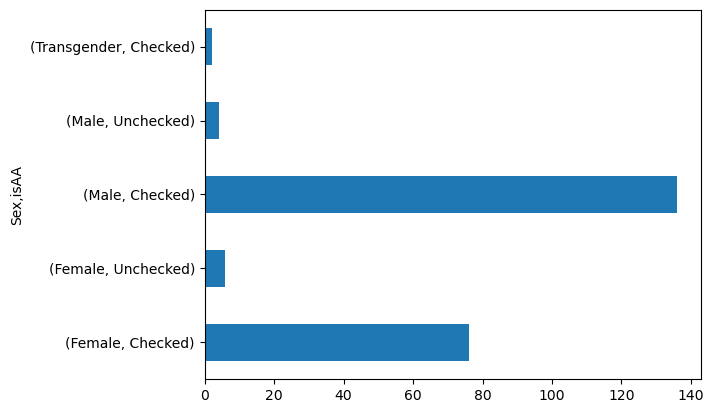

In [8]:
# Notice kind='barh' to make it horizontal

data.groupby('Sex')['isAA'].value_counts().plot(kind = 'barh')

We can also pivot the data such that we have a table with a column for each `isAA`.

In [9]:
gender_race_piv = pd.pivot_table(data,
                                 index = 'Sex',
                                 columns = 'isAA',
                                 values = 'Age', # Can be any column, we're just counting them
                                 aggfunc = 'count')
gender_race_piv

isAA,Checked,Unchecked
Sex,,
Female,76.0,6.0
Male,136.0,4.0
Transgender,2.0,NaN


Then, it will plot each column as a different bar.

<Axes: xlabel='Sex'>

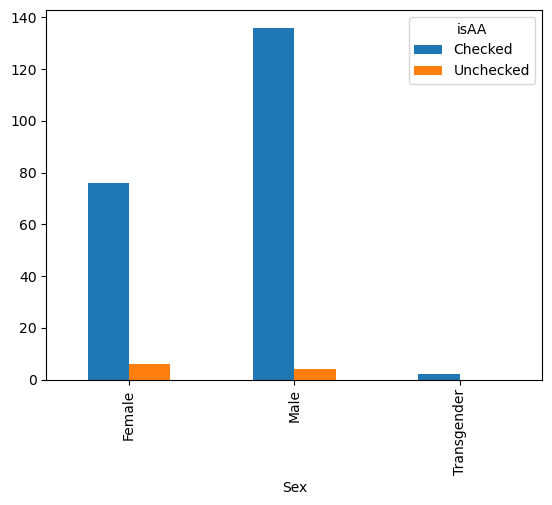

In [10]:
gender_race_piv.plot(kind = 'bar')

<Axes: xlabel='Sex'>

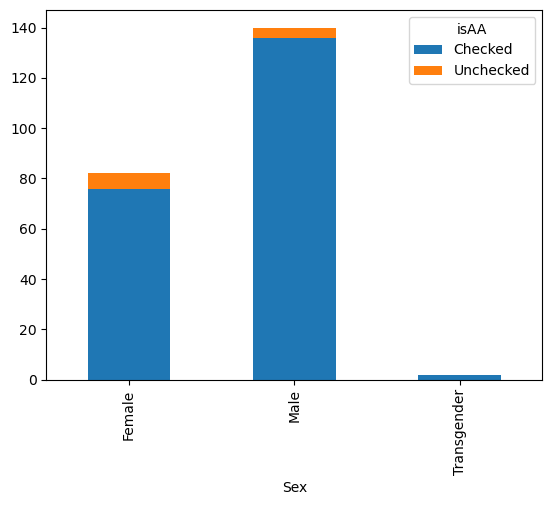

In [11]:
gender_race_piv.plot(kind = 'bar', stacked=True)

There are _dozens_ of things you can customize about your plots in this manner.
You can see them either by checking the `help` here in Colab.
To do this, run `data.plot?` in a cell by itself, and Colab will bring up some information to read.
You can also check out the documentation on the `pandas` website [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html) and in their tutorial [here](https://pandas.pydata.org/docs/user_guide/visualization.html).


## Plot Handles

If we want to make edits to the plot, we need to capture the `handle` that is generated by the plot.
This variable represents the object of the plot and allows us to manipulate its properties like the axis limits, labels, etc.
This must be done in the same cell before the image is presented.

(0.0, 160.0)

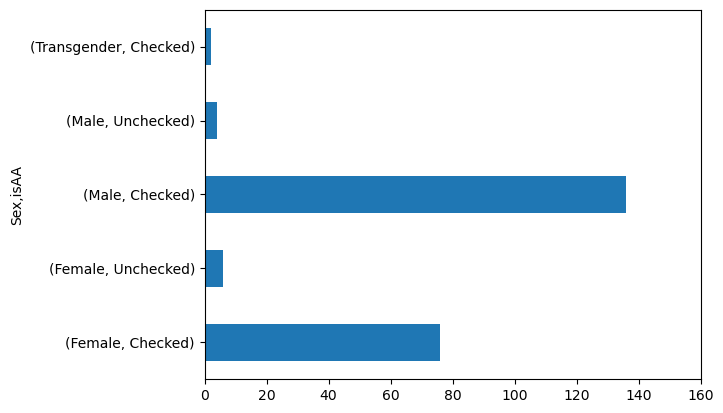

In [12]:
axis_handle = data.groupby('Sex')['isAA'].value_counts().plot(kind = 'barh')
axis_handle.set_xlim(0, 160)

Text(0.5, 0, 'Participants')

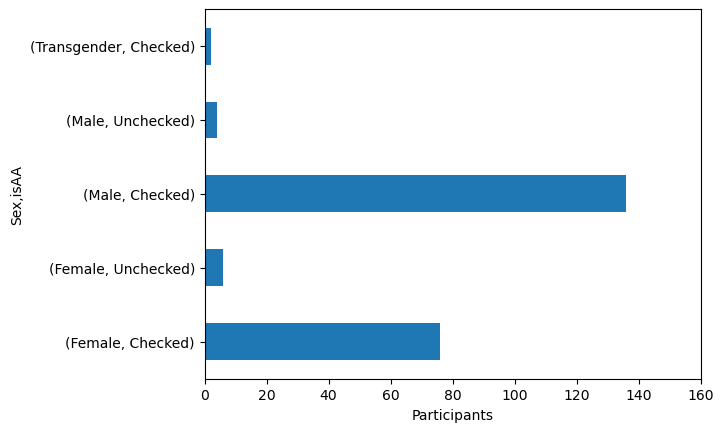

In [13]:
axis_handle = data.groupby('Sex')['isAA'].value_counts().plot(kind = 'barh')
axis_handle.set_xlim(0, 160)
axis_handle.set_xlabel('Participants')

### Q1: Explore the `cocaine_use` and `cannabinoid_use` columns.

Create a barplot of the number of cocaine, cannabinoid, multi-use, and non-use.

|               |    |
| --------------|----|
| Points        | 2  |
| Public Checks | 4  |

_Points:_ 2

In [14]:
# Add a new column indicating True for multi-use

data['multi_use'] = data['cocaine_use'] & data['cannabinoid_use'] # SOLUTION

# Add a new column indicating True for non-use
data['non_use'] = (data['cocaine_use'] | data['cannabinoid_use']) == False # SOLUTION


In [15]:
# Sum the number of True's in each use column

use_counts = data[['cocaine_use', 'cannabinoid_use', 'multi_use', 'non_use']].sum() # SOLUTION
use_counts

cocaine_use        115
cannabinoid_use    117
multi_use           84
non_use             76
dtype: int64

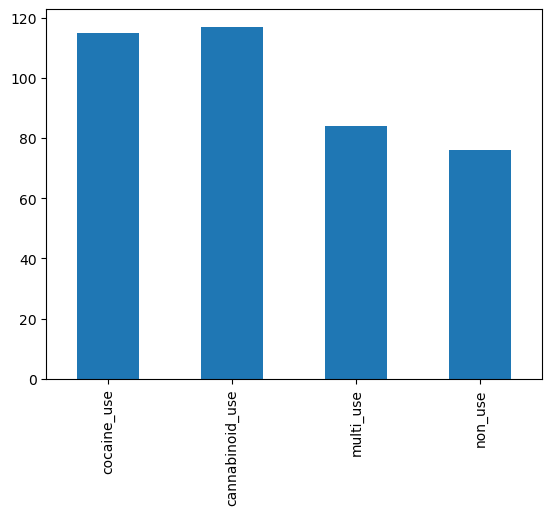

In [16]:
# Create a barplot
use_axis = use_counts.plot(kind='bar') # SOLUTION

In [ ]:
grader.check("q1_drug_use_plot")

## Numeric Variables

We can summarize numerical columns in a number of ways.

### Box Plots

<Axes: >

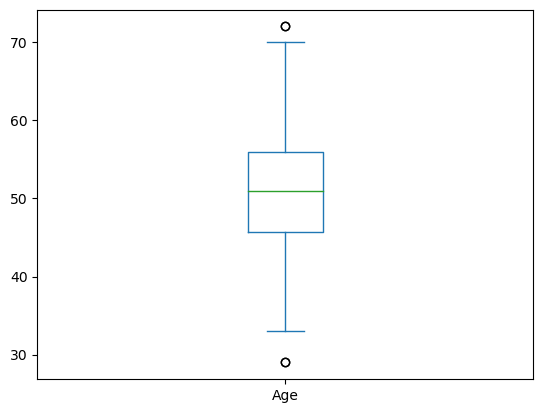

In [20]:
data['Age'].plot(kind = 'box')

Breaking it down:
 - The middle green line is the _mean_
 - The box represents the 25-75 quartiles
 - The whiskers represent the 95% confidence interval
 - The dots are outliers outside the 95% CI.

You can do multiple box plots if your data is in `wide` form.

<Axes: >

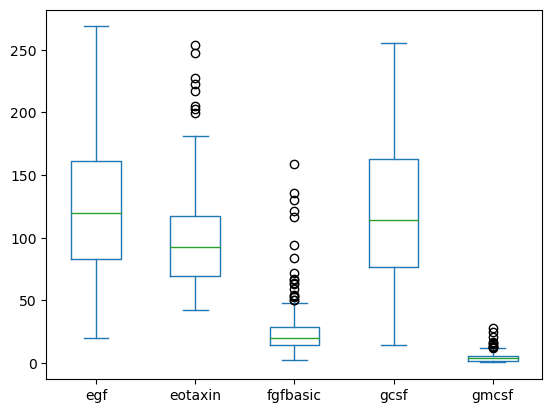

In [21]:
data[['egf', 'eotaxin', 'fgfbasic', 'gcsf', 'gmcsf']].plot(kind='box')

You can also group by another column to create subplots.

egf           Axes(0.125,0.11;0.352273x0.77)
eotaxin    Axes(0.547727,0.11;0.352273x0.77)
dtype: object

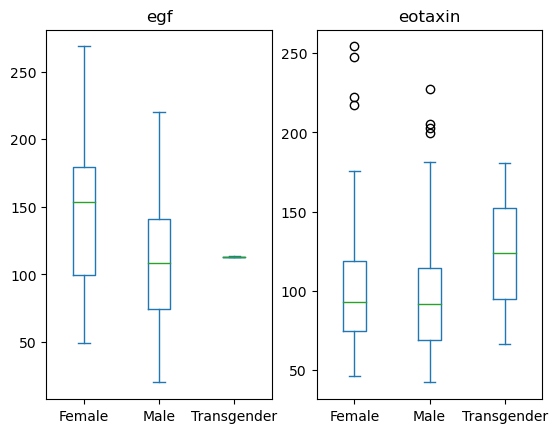

In [22]:
data[['Sex', 'egf', 'eotaxin']].plot(kind='box', by = 'Sex')

### Q2: Is the expression of `infalpha` or `vegf` different across neurological impairment status?

Create a set of boxplots to visualize the `infalpha` or `vegf` at different neurological states in the `neuro_screen_impairment_level` column.

|               |    |
| --------------|----|
| Points        | 2  |
| Public Checks | 4  |

_Points:_ 2

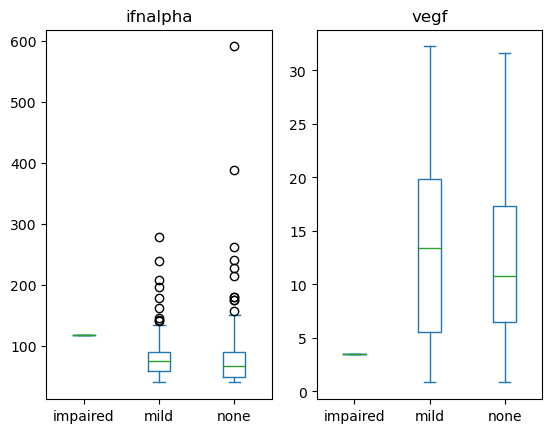

In [23]:
cols = ['neuro_screen_impairment_level', 'vegf', 'ifnalpha'] # SOLUTION NO PROMPT
q2_axes = data[cols].plot(kind='box', by = 'neuro_screen_impairment_level') # SOLUTION

In [ ]:
grader.check("q2_neuro_use_plot")

In [26]:
# DO NOT REMOVE!
plt.close()
# For the grader

### Histograms

<Axes: ylabel='Frequency'>

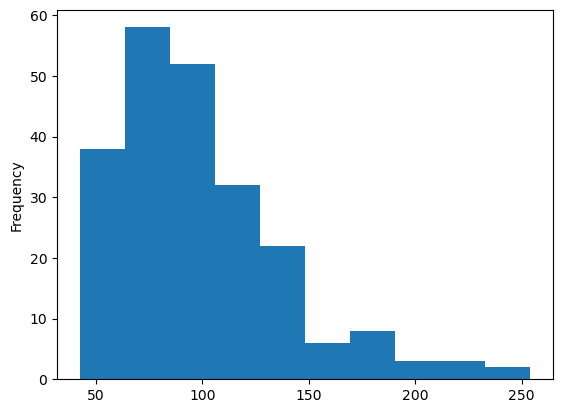

In [27]:
data['eotaxin'].plot(kind = 'hist')

Personally, I prefer to specify my bin edges explicitly instead of letting the computer decide.

<Axes: ylabel='Frequency'>

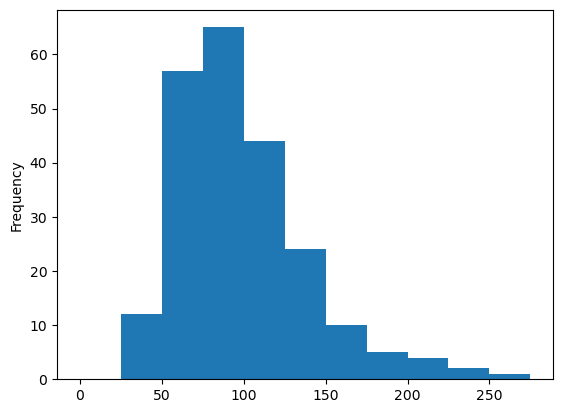

In [28]:
data['eotaxin'].plot(kind = 'hist',
                     bins = np.arange(0, 300, 25))

Sex
Female         Axes(0.125,0.11;0.775x0.77)
Male           Axes(0.125,0.11;0.775x0.77)
Transgender    Axes(0.125,0.11;0.775x0.77)
Name: eotaxin, dtype: object

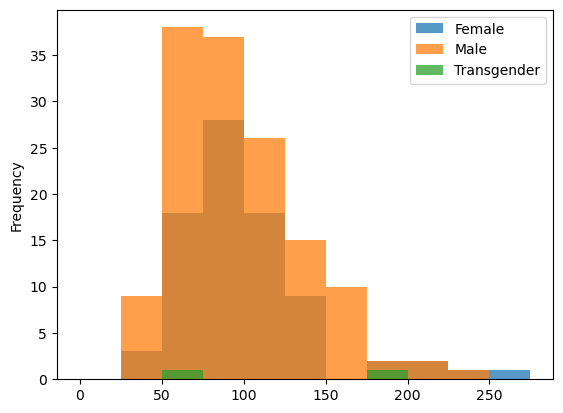

In [29]:
data.groupby('Sex')['eotaxin'].plot(kind = 'hist',
                                    bins = np.arange(0, 300, 25),
                                    alpha = 0.75,
                                    legend=True)

## Comparison of Variables

<Axes: xlabel='mip1alpha', ylabel='mip1beta'>

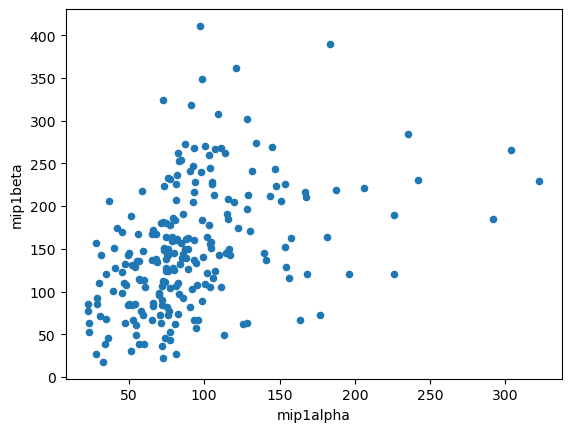

In [30]:
data.plot(kind = 'scatter', x = 'mip1alpha', y = 'mip1beta')

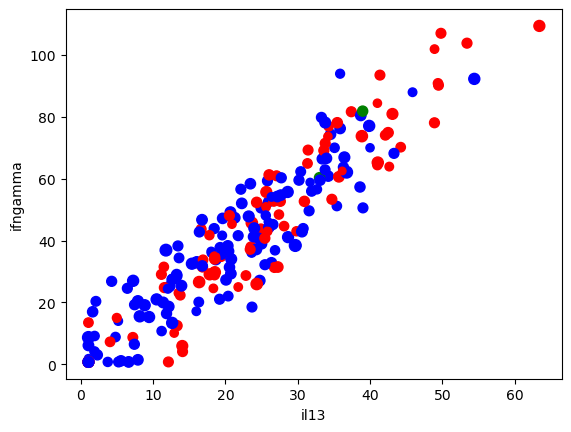

In [31]:
# We can also add colors
colors = data['Sex'].replace({'Male': 'b', 'Female': 'r', 'Transgender': 'g'})

ax = data.plot(kind = 'scatter', x = 'il13', y = 'ifngamma', 
               s = 'Age', # Make the size proportional to age
               c = colors
          )

One can also make a _GIANT_ matrix of different comparisons.

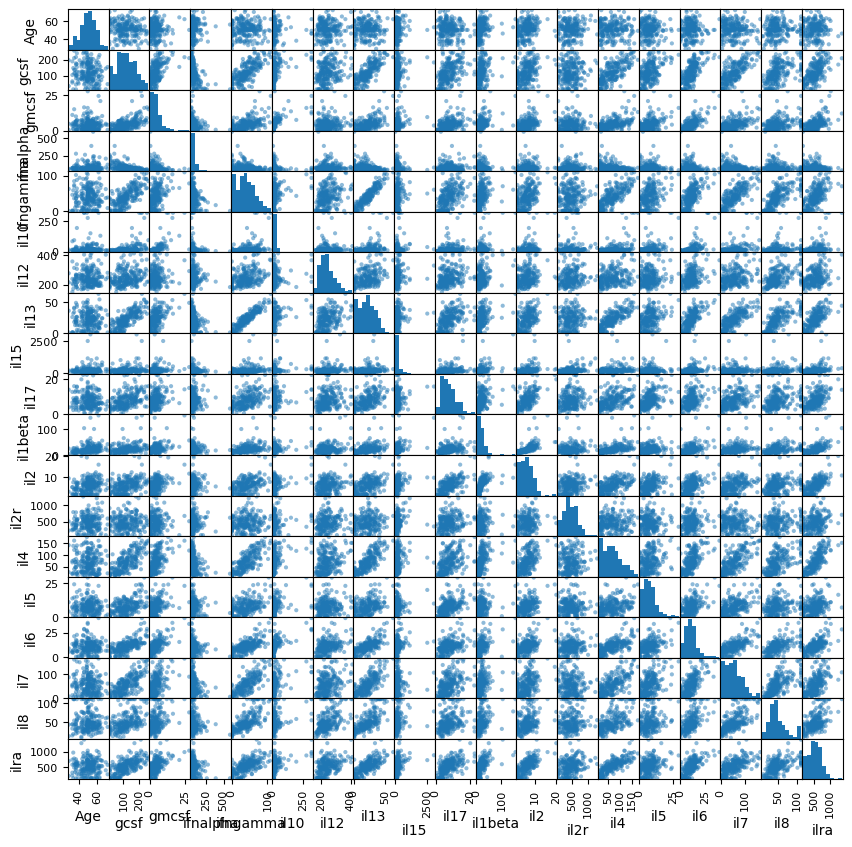

In [32]:
# It is helpful to pick columns first to prevent a figure explosion
cols = ['Age', 'gcsf', 'gmcsf',
       'ifnalpha', 'ifngamma', 'il10', 'il12', 'il13', 'il15', 'il17',
       'il1beta', 'il2', 'il2r', 'il4', 'il5', 'il6', 'il7', 'il8', 'ilra']

pd.plotting.scatter_matrix(data[cols], figsize=(10, 10));

We can also get a numeric summary of these correlations.

Method:
 - `method = 'pearson'` -  Pearson's correlation is ideal for continuous variables that have a linear relationship and are normally distributed.
 - `method = 'kendall'` - Kendall's tau is suitable for ordinal data or when dealing with non-linear relationships, especially in small samples or when data contains ties.
 - `method = 'spearman'` - Spearman's rank is best used with ordinal or non-normal data to assess monotonic relationships, being robust to outliers.


In [33]:
cross_corr = data[cols].corr(method = 'pearson')

# Using .style we can create a visually accented table
cross_corr.style.background_gradient(cmap='RdBu', vmin=-1, vmax=1)

,Age,gcsf,gmcsf,ifnalpha,ifngamma,il10,il12,il13,il15,il17,il1beta,il2,il2r,il4,il5,il6,il7,il8,ilra
Age,1.000000,-0.138601,0.025381,0.151691,0.028367,-0.020368,0.054970,0.037198,0.091752,-0.068860,0.267359,0.246212,0.093771,0.010019,-0.061873,0.026794,-0.078327,0.002176,0.008464
gcsf,-0.138601,1.000000,0.557713,-0.482685,0.750044,0.436466,0.260339,0.802374,0.241813,0.478915,0.314062,0.420381,0.081597,0.729213,0.505447,0.677255,0.736280,0.531052,0.665777
gmcsf,0.025381,0.557713,1.000000,-0.243742,0.494296,0.664964,0.148070,0.572021,0.193861,0.391024,0.445546,0.469479,0.043457,0.562916,0.448692,0.717995,0.512550,0.371020,0.573143
ifnalpha,0.151691,-0.482685,-0.243742,1.000000,-0.310915,-0.166206,-0.033597,-0.357502,-0.087955,0.028181,-0.040962,0.073912,0.013190,-0.315913,-0.087407,-0.236207,-0.288627,-0.210411,-0.263505
ifngamma,0.028367,0.750044,0.494296,-0.310915,1.000000,0.375722,0.368554,0.933985,0.181085,0.492297,0.412781,0.479059,0.101155,0.779431,0.451532,0.692426,0.782223,0.719207,0.669997
il10,-0.020368,0.436466,0.664964,-0.166206,0.375722,1.000000,0.170408,0.403432,0.140076,0.280245,0.457242,0.389750,0.097774,0.442361,0.385806,0.620481,0.439171,0.300991,0.444492
il12,0.054970,0.260339,0.148070,-0.033597,0.368554,0.170408,1.000000,0.398808,0.197413,0.260844,0.300701,0.244419,0.115518,0.314940,0.132016,0.427060,0.354507,0.485122,0.428603
il13,0.037198,0.802374,0.572021,-0.357502,0.933985,0.403432,0.398808,1.000000,0.202042,0.531708,0.442948,0.503528,0.159311,0.809495,0.418689,0.737718,0.764736,0.717813,0.747175
il15,0.091752,0.241813,0.193861,-0.087955,0.181085,0.140076,0.197413,0.202042,1.000000,0.248006,0.466990,0.325552,0.211610,0.209317,0.150825,0.265412,0.076294,0.177314,0.359000
il17,-0.068860,0.478915,0.391024,0.028181,0.492297,0.280245,0.260844,0.531708,0.248006,1.000000,0.353137,0.656041,0.229345,0.467742,0.520928,0.451760,0.466016,0.302081,0.594334


`cross_corr` is just a `DataFrame`, which means we can extract columns.

<Axes: >

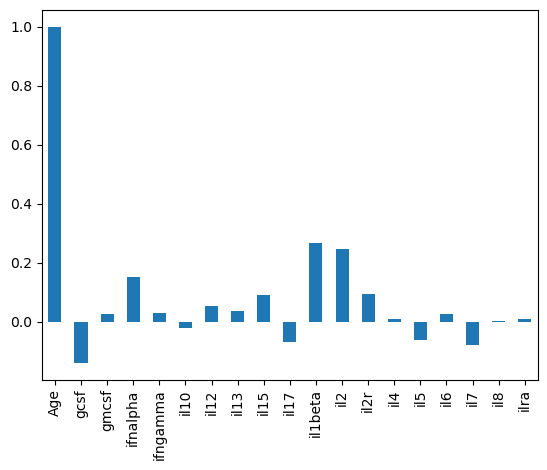

In [34]:
# How does each cytokine correlate with Age?

cross_corr['Age'].plot(kind='bar')

These excercises should provide a basic set of plotting tools to visualize tabular data.
In the next week we'll explore more advanced 'statistical plotting' with the `seaborn` library.
This will add additional features like better faceting across groups, confidence intervals through bootstrapping, better legends, and more control to our plots.
In future weeks we'll also explore how to assess statistical significance across groups and strategies for finding correlated parameters.

## Matplotlib Gotchas

![Rakes](https://media.giphy.com/media/v1.Y2lkPTc5MGI3NjExbDdhNHg4NjE2N2s1cnd2MTdhYjV3NGttaThwbHE5MG93MDIydWhwdyZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/3o6Mbtdd7dhvbvugg0/giphy.gif)

While Matplotlib is great, it is sometimes incredibly frustrating.
Here's a handful of common rakes that I run across.

How do you get plots out of here?

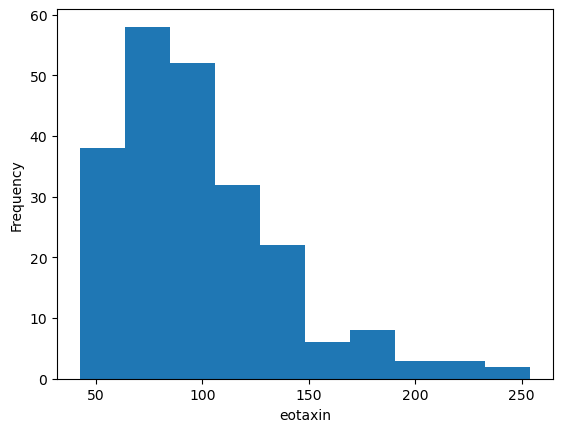

In [35]:
# Make the plot and grab the axis object

ax = data['eotaxin'].plot(kind = 'hist')

ax.set_xlabel('eotaxin')

# Get the Figure handle this axis is on
fig = ax.figure


# Save the figure
fig.savefig('eotaxin_hist.png', # Can be any extension, but you probably want PNGs
            dpi = 50 # Good quality for viewing and debugging, use 300 for publications
            )

Overlapping labels.

egf           Axes(0.125,0.11;0.168478x0.77)
eotaxin    Axes(0.327174,0.11;0.168478x0.77)
gmcsf      Axes(0.529348,0.11;0.168478x0.77)
hgf        Axes(0.731522,0.11;0.168478x0.77)
dtype: object

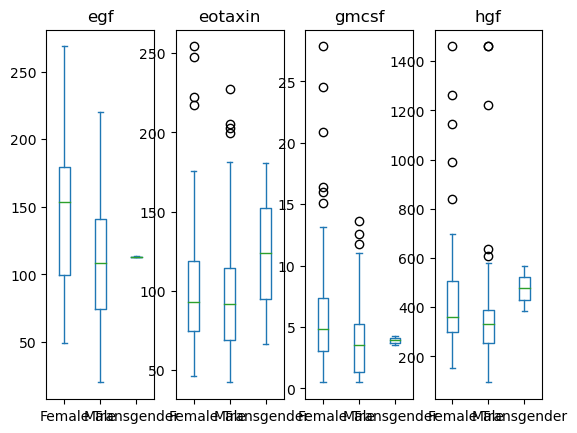

In [36]:
data[['Sex', 'egf', 'eotaxin', 'hgf', 'gmcsf']].plot(kind='box', by = 'Sex')

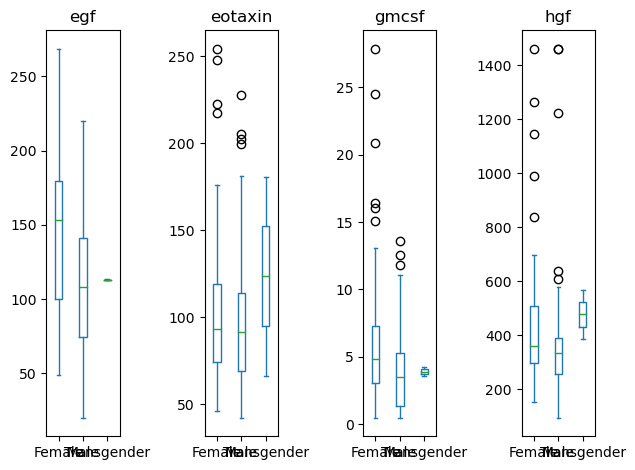

In [37]:
# Grab the series of axis objects
ax_ser = data[['Sex', 'egf', 'eotaxin', 'hgf', 'gmcsf']].plot(kind='box', by = 'Sex')

# Somehow get the figure object
fig = ax_ser.iloc[0].figure

# Re-layout the figure
fig.tight_layout()

Rotating labels.

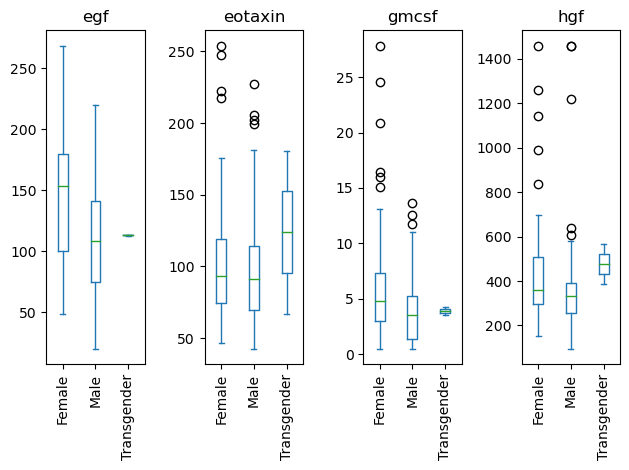

In [38]:
# Grab the series of axis objects
ax_ser = data[['Sex', 'egf', 'eotaxin', 'hgf', 'gmcsf']].plot(kind='box', by = 'Sex')

# Somehow get the figure object
fig = ax_ser.iloc[0].figure

# Create a function that fixes each axis
# lambda ax: ax.tick_params(axis='x', labelrotation=90)

# Apply that function across all axes BEFORE the re-layout
ax_ser.map(lambda ax: ax.tick_params(axis='x', labelrotation=90))

# Re-layout the figure
fig.tight_layout()

---------------------------------------------

## Submission

You do not need to submit this walkthrough notebook.
Simply complete the quiz.